In [ ]:
!pip install tensorflow

In [ ]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/Dataset/data.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
import os

dataset_path = "/content/data"

class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}
print(class_counts)


{'test': 7, 'train': 7}


Found 5650 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.3759 - loss: 1.7529 - val_accuracy: 0.9036 - val_loss: 0.6425
Epoch 2/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.8186 - loss: 0.6403 - val_accuracy: 0.9664 - val_loss: 0.3032
Epoch 3/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9195 - loss: 0.3454 - val_accuracy: 0.9650 - val_loss: 0.2065
Epoch 4/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9336 - loss: 0.2556 - val_accuracy: 0.9843 - val_loss: 0.1378
Epoch 5/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9618 - loss: 0.1706 - val_accuracy: 0.9929 - val_loss: 0.1042
Epoch 6/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step - accuracy: 0.9693 - loss: 0.1396 - val_accuracy: 0.9886 - val_loss: 0.1022
Epoch 7/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.9775 - loss: 0.1138 - val_accuracy: 0.9950 - val_loss: 0.0712
Epoch 8/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.9837 - loss: 0.0876 - val_accu

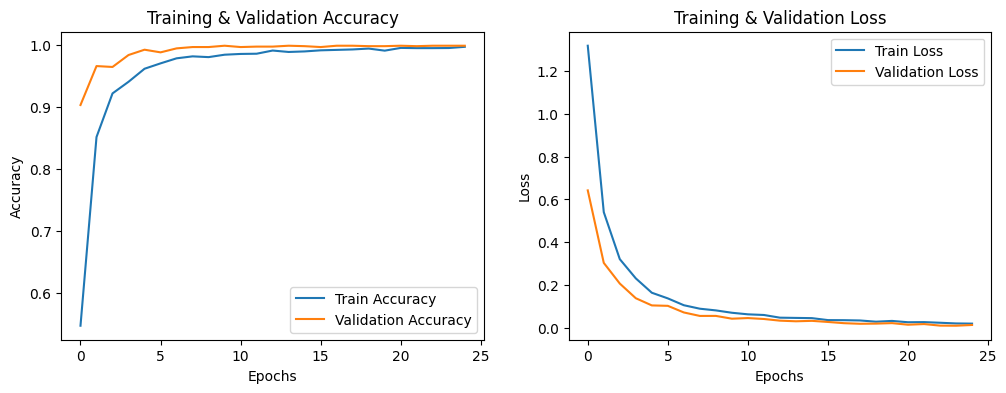

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# ✅ Set dataset directory (Modify this to your actual path)
dataset_path = "/content/data"  # Change as needed

# ✅ Define image size, batch size, and classes
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir(os.path.join(dataset_path, "train")))  # Counts class folders

# ✅ Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load Train & Test Data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ✅ Load Pretrained Model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze pretrained layers

# ✅ Build the Model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(NUM_CLASSES, activation="softmax")
])

# ✅ Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ✅ Train the Model with Early Stopping
EPOCHS = 25
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(train_generator, epochs=EPOCHS,
                    validation_data=test_generator,
                    callbacks=[early_stopping])

# ✅ Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n📊 Test Accuracy: {test_acc * 100:.2f}%")

# ✅ Save the Trained Model
model.save("currency_model.keras")
print("\n✅ Model saved successfully as currency_model.keras")

# ✅ Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()

    plt.show()

# ✅ Show Training Graphs
plot_history(history)
